In [62]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)
from corpus_stats import ks_test

In [2]:
df = pd.read_csv('sentiment.csv', index_col=0)

pos_df, neg_df = df[df['target']==1], df[df['target']==0]

for label in list(df):
	if label != 'target':
		ks_test(pos_df[label].values, neg_df[label].values, label)

/home/jinny/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


===== KS test for sentiment =====
KS statistic: 0.14282291241002698
p-value: 0.0
The two distributions are significantly different. 
===== KS test for polarity =====
KS statistic: 0.15519695890975838
p-value: 0.0
The two distributions are significantly different. 


In [5]:
def create_value_df_dict(pos_df, neg_df):
	result = {}
	for label in pos_df.columns:
		if label != 'target':
			values={
				'positive': list(pos_df[label].values), 
				'negative': list(neg_df[label].values)}
			result[label] = values
	return result

In [6]:
sentiment_values = create_value_df_dict(pos_df, neg_df)

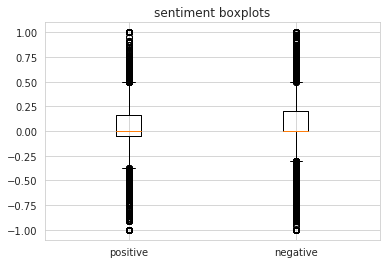

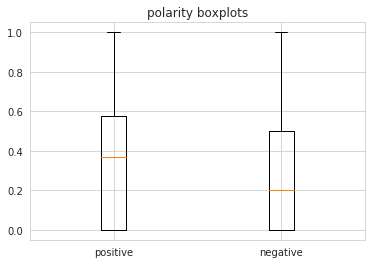

In [50]:
for key in sentiment_values:
    
    figure, ax = plt.subplots()
    labels, data = sentiment_values[key].keys(), sentiment_values[key].values()
    ax.boxplot(data, labels=labels)
    ax.set_title(key + ' boxplots')

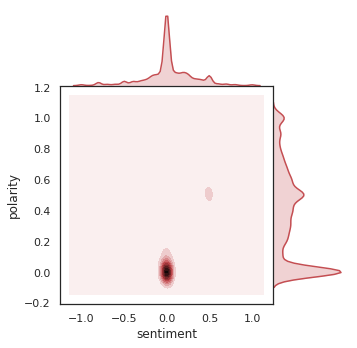

In [63]:
sns.jointplot(x='sentiment', 
              y='polarity', 
              data=pos_df, 
              kind="kde",
              space=0,
              height=5, ratio=3, color='r')

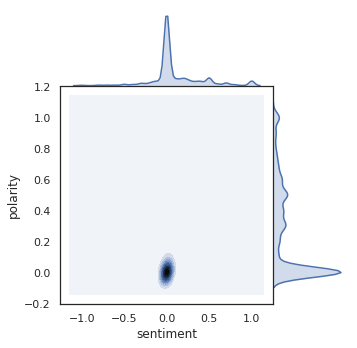

In [59]:
sns.jointplot(x='sentiment', 
              y='polarity', 
              data=neg_df.head(64672), 
              kind="kde",
              space=0,
              height=5, 
              ratio=3, 
              color='b')